# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['ramygala', 'ushuaia', 'medicine hat', 'ocampo', 'avera', 'tiksi', 'chokurdakh', 'karaul', 'qaanaaq', 'luderitz', 'roma', 'saint-pierre', 'georgetown', 'mataura', 'yellowknife', 'klaksvik', 'northam', 'longyearbyen', 'saint-philippe', 'fort abbas', 'portland', 'port alfred', 'chanal', 'general pico', 'kargasok', 'praia da vitoria', 'grindavik', 'banda aceh', 'omsukchan', 'jaisalmer', 'guerrero negro', 'nanortalik', 'salalah', 'golden', 'bac lieu', 'fort portal', 'albany', 'bredasdorp', 'mar del plata', 'kirakira', 'butaritari', 'atuona', 'avarua', 'hermanus', 'rocha', 'karacabey', 'cape town', 'flinders', 'arraial do cabo', 'ahipara', 'maxixe', 'rikitea', 'sur', 'morgan city', 'dikson', 'vanavara', 'punta arenas', 'hilo', 'carnarvon', 'nikolskoye', 'castro', 'nizhneyansk', 'tambo', 'busselton', 'bluff', 'norman wells', 'tsihombe', 'khatanga', 'kaset sombun', 'clearlake', 'mount isa', 'lorengau', 'spornoye', 'khowst', 'atasu', 'hobart', 'hithadhoo', 'bjornevatn', 'elbasan', 'vaini', 'b

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
# Import Url.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Check response
    #city = 'roma'
    #response = requests.get(query_url + city).json()
    #print(response)
# Variables
city_weather = []
count = 1
set_count = 1

# Use for loop to retrieve weather data for cities
for i, city in enumerate(cities):
    # Retrieve cities 50 at a time.  After each set of 50, restart the count at 1 and increase the set count by 1
    if i >= 50 and i % 50 == 0:
        count = 1
        set_count += 1

    # Add cities to url
    weather_url = query_url + city

    print(f'Processing record {count} of Set {set_count} | {city}')
    
    count += 1

    # Add try/except
    try:
        response = requests.get(query_url + city).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        # If these return values, add as dictionary to city_weather
        city_weather.append({'City': city, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country, 'Date': date})
        
    except (KeyError, IndexError):
        print(f'City \033[1mnot\033[0m found. Skipping...')
        pass
    


mnot found. Skipping...
Processing record 10 of Set 4 | nome
Processing record 11 of Set 4 | amderma
City not found. Skipping...
Processing record 12 of Set 4 | shenkursk
Processing record 13 of Set 4 | puerto ayora
Processing record 14 of Set 4 | komsomolskiy
Processing record 15 of Set 4 | creston
Processing record 16 of Set 4 | fairbanks
Processing record 17 of Set 4 | macaboboni
City not found. Skipping...
Processing record 18 of Set 4 | coruripe
Processing record 19 of Set 4 | saldanha
Processing record 20 of Set 4 | rawlins
Processing record 21 of Set 4 | fortuna
Processing record 22 of Set 4 | ubinskoye
Processing record 23 of Set 4 | mayo
Processing record 24 of Set 4 | port lincoln
Processing record 25 of Set 4 | bow island
Processing record 26 of Set 4 | vostok
Processing record 27 of Set 4 | sitka
Processing record 28 of Set 4 | osa
Processing record 29 of Set 4 | west helena
Processing record 30 of Set 4 | ribeira grande
Processing record 31 of Set 4 | okha
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Create DataFrame
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv('City_Weather_Data.csv', index=False)
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ramygala,55.5167,24.3000,50.00,87,75,5.75,LT,1619757685
1,ushuaia,-54.8000,-68.3000,39.20,75,90,5.75,AR,1619757685
2,medicine hat,50.0501,-110.6683,59.00,41,75,9.22,CA,1619757605
3,ocampo,21.6500,-101.5000,63.32,40,29,7.63,MX,1619757686
4,avera,33.1940,-82.5271,71.60,68,1,9.22,US,1619757609
...,...,...,...,...,...,...,...,...,...
547,victoria point,-27.5833,153.3000,68.00,88,82,1.99,AU,1619757934
548,raahe,64.6833,24.4833,33.01,100,20,6.91,FI,1619757935
549,galdar,28.1470,-15.6502,63.00,82,20,2.30,ES,1619757935
550,gore,-46.1028,168.9436,53.01,72,39,10.00,NZ,1619757935


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
#  Get the indices of cities that have humidity over 100%.
# Create list of indices if any exist
high_humidity = []

for x in city_weather_df.index:
    if city_weather_df.iloc[x, 4] > 100:
        high_humidity.append(x)
print(high_humidity)

[]


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


13.78
105.28


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

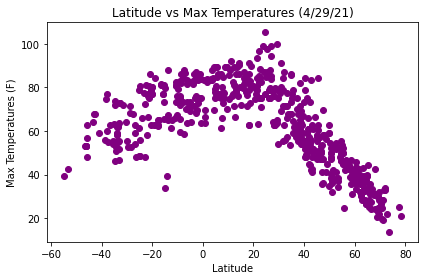

In [59]:

plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], color='purple')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (F)')
plt.title('Latitude vs Max Temperatures (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_temp.png', facecolor ='w' )
plt.show()

This scatter plot shows exactly what we expect with latitude and max temperatures.  The cities farthest from the equator are the coldest, and the max temperatures rise as you get closer to 0 degrees latitude.

## Latitude vs. Humidity Plot

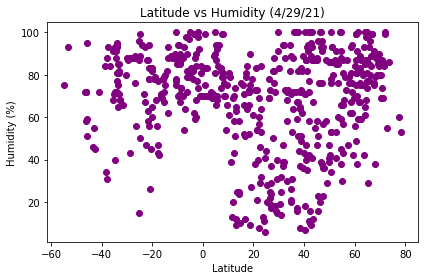

In [58]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], color='purple')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_humidity.png', facecolor ='w' )
plt.show()

At least for this month, humidity and latitude do not seem to have a correlation.

## Latitude vs. Cloudiness Plot

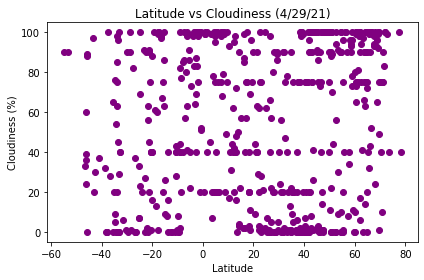

In [57]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], color='purple')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_cloudiness.png', facecolor ='w' )
plt.show()

As expected, latitude and cloudiness also have no correlation.

## Latitude vs. Wind Speed Plot

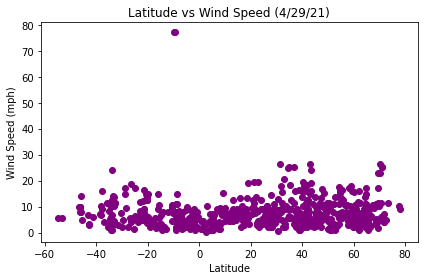

In [60]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], color='purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs Wind Speed (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_windspeed.png', facecolor ='w' )
plt.show()

If we were to drop the outlier and reduce the y-values, we would see that there is no correlation between city latitude and its wind speed.  This graph shows that for the most part, cities at any latitude can have wind speeds between 0 and 30 mph.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [72]:
# Limit city_weather_df to northern and southern hemispheres
northern_df = city_weather_df.loc[city_weather_df['Lat'] > 0]
northern_df
southern_df = city_weather_df.loc[city_weather_df['Lat'] < 0]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ushuaia,-54.8000,-68.3000,39.20,75,90,5.75,AR,1619757685
8,luderitz,-26.6481,15.1594,54.30,76,0,18.54,NA,1619757687
10,saint-pierre,-21.3393,55.4781,77.00,78,1,9.22,RE,1619757688
12,mataura,-46.1927,168.8643,53.01,72,24,10.00,NZ,1619757689
17,saint-philippe,-21.3585,55.7679,77.00,78,45,9.22,RE,1619757690
...,...,...,...,...,...,...,...,...,...
530,dores do indaia,-19.4633,-45.6017,62.56,78,100,4.90,BR,1619757929
540,yulara,-25.2406,130.9889,78.80,15,33,5.75,AU,1619757932
542,alto araguaia,-17.3147,-53.2153,64.94,42,100,5.57,BR,1619757933
547,victoria point,-27.5833,153.3000,68.00,88,82,1.99,AU,1619757934


The correlation coefficient is: -0.8812583128441038 and the r-squared value is: 0.7766162139568363


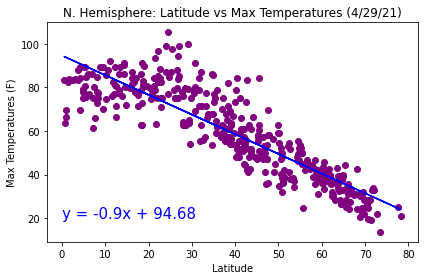

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Max Temp'])
regress_values = northern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_df['Lat'], northern_df['Max Temp'], color='purple')
plt.annotate(line_eq, (0,20),fontsize=15,color='blue')
plt.plot(northern_df['Lat'], regress_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (F)')
plt.title('N. Hemisphere: Latitude vs Max Temperatures (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_temp_northern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()


This graph and our correlation coefficient further confirms that we do, in fact, see a correlation between latitude and temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.5996290174734277 and the r-squared value is: 0.3595549585961482


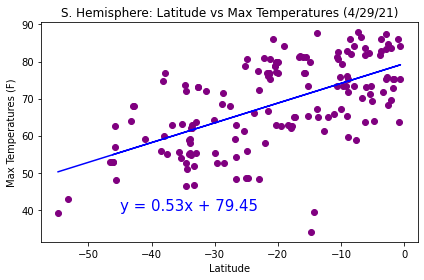

In [77]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Max Temp'])
regress_values = southern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_df['Lat'], southern_df['Max Temp'], color='purple')
plt.annotate(line_eq, (-45,40),fontsize=15,color='blue')
plt.plot(southern_df['Lat'], regress_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (F)')
plt.title('S. Hemisphere: Latitude vs Max Temperatures (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_temp_southern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()

We can see by the correlation coefficient and accompanying scatter plot that there is a fairly strong correlation between latitudes in the Southern Hemisphere and max temperature.  Though the correlation is not as strong as latitude vs. temperature in the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.21773513008620482 and the r-squared value is: 0.04740858687365654


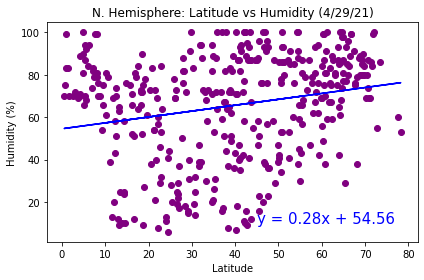

In [68]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Humidity'])
regress_values = northern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_df['Lat'], northern_df['Humidity'], color='purple')
plt.annotate(line_eq, (45,10),fontsize=15,color='blue')
plt.plot(northern_df['Lat'], regress_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('N. Hemisphere: Latitude vs Humidity (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_humidity_northern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()

Our correlation coefficient here confirms that there is a very weak correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.19172673549652003 and the r-squared value is: 0.03675914110415255


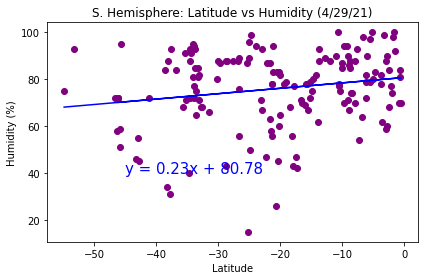

In [78]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Humidity'])
regress_values = southern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_df['Lat'], southern_df['Humidity'], color='purple')
plt.annotate(line_eq, (-45,40),fontsize=15,color='blue')
plt.plot(southern_df['Lat'], regress_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('S. Hemisphere: Latitude vs Humidity (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_humidity_southern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()

Our correlation coefficient here confirms that there is a very weak correlation between latitude and humidity in the Southern Hemisphere as well.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.15393895676018748 and the r-squared value is: 0.023697202408414872


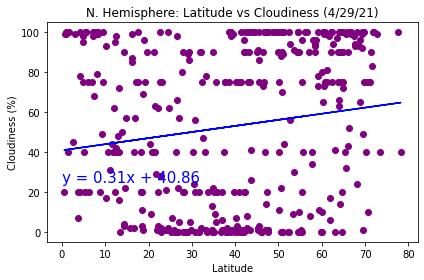

In [70]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Cloudiness'])
regress_values = northern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_df['Lat'], northern_df['Cloudiness'], color='purple')
plt.annotate(line_eq, (0,25),fontsize=15,color='blue')
plt.plot(northern_df['Lat'], regress_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('N. Hemisphere: Latitude vs Cloudiness (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_cloudiness_northern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()

The correlation coefficient confirms that there is a very weak correlation between latitude and cloudiness, as expected.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.21479009011674385 and the r-squared value is: 0.04613478281235894


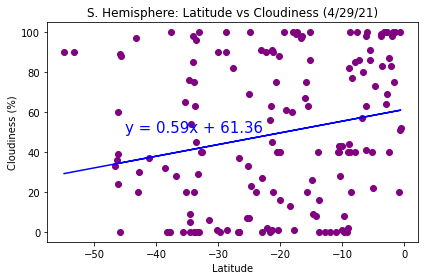

In [82]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Cloudiness'])
regress_values = southern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_df['Lat'], southern_df['Cloudiness'], color='purple')
plt.annotate(line_eq, (-45,50),fontsize=15,color='blue')
plt.plot(southern_df['Lat'], regress_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('S. Hemisphere: Latitude vs Cloudiness (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_cloudiness_southern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()

The correlation coefficient confirms that there is a very weak correlation between latitude and cloudiness in the Southern Hemisphere as well.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.17278166112042534 and the r-squared value is: 0.029853502419533502


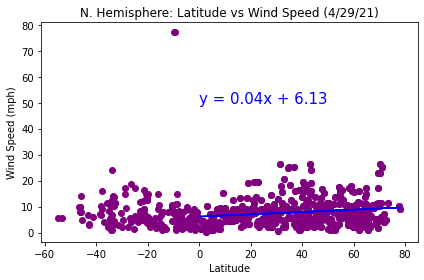

In [81]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Wind Speed'])
regress_values = northern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_df['Lat'], northern_df['Wind Speed'], color='purple')
plt.annotate(line_eq, (0,50),fontsize=15,color='blue')
plt.plot(northern_df['Lat'], regress_values, color='blue')
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], color='purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('N. Hemisphere: Latitude vs Wind Speed (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_windspeed_northern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()

The correlation coefficient confirms that there is a very weak correlation between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.01457441562188269 and the r-squared value is: 0.0002124135907193782


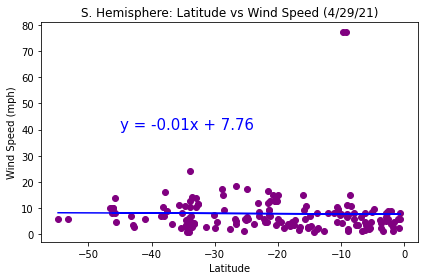

In [80]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Wind Speed'])
regress_values = southern_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_df['Lat'], southern_df['Wind Speed'], color='purple')
plt.annotate(line_eq, (-45,40),fontsize=15,color='blue')
plt.plot(southern_df['Lat'], regress_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('S. Hemisphere: Latitude vs Wind Speed (4/29/21)')
plt.tight_layout()
plt.savefig('Images/lat_vs_windspeed_southern.png', facecolor ='w' )
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()

Our correlation coefficient confirms that there is a very weak correlation between latitude and wind speed in the Southern Hemisphere as well.